In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.ticker as ticker

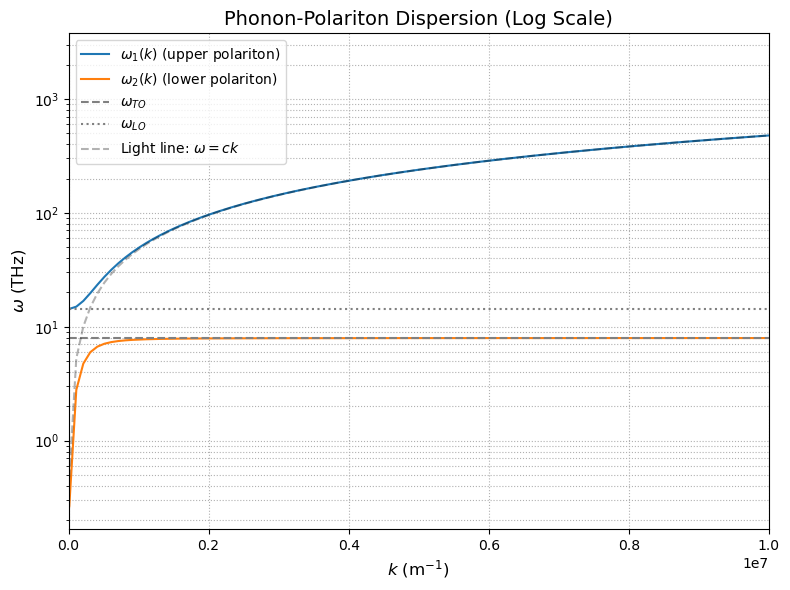

In [3]:
# --- Constants (in rad/s) ---
w_TO = 5e13     # TO phonon
w_LO = 9e13     # LO phonon
c = 3e8         # speed of light

# Conversion: rad/s → THz
rad2THz = 1 / (2 * np.pi * 1e12)

# --- k values ---
k = np.linspace(1e4, 5e7, 500)  # start at small nonzero k to avoid log(0)

# --- Dispersion calculation ---
x = c**2 * k**2
sqrt_term = np.sqrt((w_LO**2 + x)**2 - 4 * x * w_TO**2)
w1 = np.sqrt(0.5 * (w_LO**2 + x + sqrt_term)) * rad2THz
w2 = np.sqrt(0.5 * (w_LO**2 + x - sqrt_term)) * rad2THz

# --- Plot ---
plt.figure(figsize=(8, 6))
plt.plot(k, w1, label=r'$\omega_1(k)$ (upper polariton)')
plt.plot(k, w2, label=r'$\omega_2(k)$ (lower polariton)')

# Horizontal lines
plt.axhline(w_TO * rad2THz, color='gray', linestyle='--', label=r'$\omega_{TO}$')
plt.axhline(w_LO * rad2THz, color='gray', linestyle=':', label=r'$\omega_{LO}$')

# Light line
plt.plot(k, c * k * rad2THz, 'k--', alpha=0.3, label=r'Light line: $\omega = ck$')

plt.xlabel(r'$k$ (m$^{-1}$)', fontsize=12)
plt.ylabel(r'$\omega$ (THz)', fontsize=12)
plt.title('Phonon-Polariton Dispersion (Log Scale)', fontsize=14)
plt.yscale('log')
plt.xlim(0, 1e7)
plt.legend()
plt.grid(True, which='both', ls=':')
plt.tight_layout()
plt.savefig("task 1 plot.png", dpi=300)
plt.show()


In [4]:
omeg_LO = 2.01e13
omeg_TO = 9.6e12

print((omeg_LO / omeg_TO)**2)

4.3837890625


In [5]:
# Molar Masses

Mg = 24.305
Fe = 55.84
SiO4 = 28.085 + 4 * 15.999

Mg2SiO4 = 2 * Mg + SiO4
Fe2SiO4 = 2 * Fe + SiO4

molar_mass = 0.5 * Mg2SiO4 + 0.5 * Fe2SiO4
molar_mass_kg = molar_mass / 1000

a = 4.666e-10
b = 10e-10
c = 5.87e-10

olivine_unit_cell = a * b * c 

avagadro = 6.022e23
molar_volume = olivine_unit_cell * avagadro / 4

density = molar_mass_kg / molar_volume
print(density)

4176.717669096758


In [8]:
B0 = 129e9
B0_prime = 4.3
G0 = 78e9
g1 = 1.71
g2 = -0.027e-9
pressure1 = 1.01325e5
pressure2 = 10e9
pressure = np.array([pressure1, pressure2])

bulk_mod = B0 + B0_prime * pressure
shear_mod = G0 + g1 * pressure + g2 * pressure **2

p_wave = np.sqrt((bulk_mod + 4/3 * shear_mod) / density)
s_wave = np.sqrt(shear_mod / density)

print(f'P wave velocity: {p_wave} \n S wave velocity: {s_wave}')


P wave velocity: [7468.97528072 8406.99166437] 
 S wave velocity: [4321.45727824 4703.47051467]


In [9]:
import numpy as np

# Constants
B0 = 129e9  # Pa
B0_prime = 4.3
G0 = 78e9   # Pa
g1 = 1.71
g2 = -0.027e-9  # Pa^-1
density = 4176.7  # kg/m³

# Pressures (in Pascals)
pressure = np.array([101325, 10e9])  # surface and 200 km depth

# Bulk and shear modulus with pressure dependence
bulk_mod = B0 + B0_prime * pressure
shear_mod = G0 + g1 * pressure + g2 * pressure**2

# Wave velocities
p_wave = np.sqrt((bulk_mod + 4/3 * shear_mod) / density)
s_wave = np.sqrt(shear_mod / density)

# Output
print(f'P-wave velocities at [surface, 200km]: {p_wave} m/s')
print(f'S-wave velocities at [surface, 200km]: {s_wave} m/s')


P-wave velocities at [surface, 200km]: [7468.99107907 8407.00944681] m/s
S-wave velocities at [surface, 200km]: [4321.46641897 4703.48046343] m/s


In [10]:
m_p = ( p_wave[0] - s_wave[0] ) / 200
m_s = ( p_wave[1] - s_wave[1] ) / 200

print(m_p, m_s)

15.737623300460195 18.517644916903865


In [11]:
from scipy.optimize import fsolve

def v_p(d):
    return p_wave[0] + m_p * d

def v_s(d):
    return s_wave[0] + m_s * d

# Time difference function (d in km)
def time_diff(d):
    return d * (1 / v_s(d) - 1 / v_p(d)) - 40

# Solve for depth (in km)
depth_km = fsolve(time_diff, 300)[0]
print(f"Estimated earthquake depth: {depth_km:.2f} km")

Estimated earthquake depth: 300.00 km


C:\Users\kearb\AppData\Local\Temp\ipykernel_23780\1315526302.py:14: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  depth_km = fsolve(time_diff, 300)[0]


### Homework 8

In [12]:
# Problem 1 calculations:

#subtask a

wavelength = 0.4e-10 #wavelength of 0.4 Angstroms

q_max = 4 * np.pi / wavelength  # maximum q value

q_max_scientific = "{:.2e}".format(q_max)
print(f"Maximum q value: {q_max_scientific} m^-1")

Maximum q value: 3.14e+11 m^-1


In [13]:
wavelength_BLS = 520e-9
q_max_BLS = 4 * np.pi / wavelength_BLS

q_max_BLS_scientific = "{:.2e}".format(q_max_BLS)

print(f"Maximum q value for BLS: {q_max_BLS_scientific} m^-1")

Maximum q value for BLS: 2.42e+07 m^-1


In [14]:
v_1 = 8.3e9
v_2 = 14.0e9

w1 = 2 * np.pi * v_1
w2 = 2 * np.pi * v_2
w1_scientific = "{:.2e}".format(w1)
w2_scientific = "{:.2e}".format(w2)


print(w1_scientific, w2_scientific)

5.22e+10 8.80e+10


In [15]:
def velocity(w, lambda_L=520e-9):
    velocity = lambda_L * w / (np.sqrt(2))
    return velocity

velocity1 = velocity(v_1)
velocity2 = velocity(v_2)

print(velocity1, velocity2)

3051.8728676011388 5147.737367038066


In [16]:
density_gcm = 5.327

density_kgm = density_gcm / 1000 * 100**3
print(f"Density in kg/m³: {density_kgm}")

Density in kg/m³: 5327.0


In [17]:
v_L = velocity2
v_T = velocity1

G = density_kgm * v_T**2
B = density_kgm * v_L**2 - 4/3 * G
print(f"Shear modulus (G): {G:.2e} Pa")
print(f"Bulk modulus (B): {B:.2e} Pa")

Shear modulus (G): 4.96e+10 Pa
Bulk modulus (B): 7.50e+10 Pa


In [18]:
volume_pyrite = 5.4e-10 ** 3
print(volume_pyrite)

1.57464e-28


In [19]:
q_D_cubed = (6 * (np.pi)**2 * 12 / volume_pyrite)
print(q_D_cubed)
q_D = (q_D_cubed**(1/3))
print(f"Debye wavevector (q_D): {q_D:.2e} m^-1")

4.512850663506794e+30
Debye wavevector (q_D): 1.65e+10 m^-1


In [20]:
v_s = 8.02e3

w = v_s * q_D

print(f'{w: .2e}')

 1.33e+14


In [21]:
h_bar = 1.055e-34
k_B = 1.381e-23

Theta_D = h_bar * w / k_B
print(f"Debye temperature (Theta_D): {Theta_D:.2f} K")

Debye temperature (Theta_D): 1012.47 K


In [22]:
N_A = 6.022e23

C = 9 * k_B * N_A
print(f"Heat capacity (C): {C:.2e} J/K")

Heat capacity (C): 7.48e+01 J/K


In [23]:
T = 300
C_debye = 12 * np.pi**4 * N_A * k_B * T**3 / (5 * Theta_D**3)
print('Debye heat capacity (C_debye): {:.2f} J/mol·K'.format(C_debye))

Debye heat capacity (C_debye): 50.58 J/mol·K


## Homework 9 (EP5)

In [24]:
thermal_conductivity = 0.07 # W/(m·K)
thickness = 0.15 # m
T_in = 20 # °C
T_out = 0 # °C
delta_T = 15 #T_in - T_out

length = 15 # m
width = 10 # m
height = 4 # m
area = 2 * (length * height + width * height) # # surface area of the walls

heat_loss = thermal_conductivity * area * delta_T / thickness
print(f"Heat loss through the walls: {heat_loss:.2f} W")


Heat loss through the walls: 1400.00 W


In [25]:
thermal_conductivity_norway = 0.04 # W/(m·K)
thickness_norway = thickness + 0.02 # 2 cm insulation
cost = 10 # cost per m² of insulation, in Euros
cold_season = 4 # months of cold season
delta_T_norway = 15 # temperature difference in Norway
price_per_kWh = 0.4 # price of electricity in Euros per kWh
area_norway = area  # assuming same area for insulation

heat_loss_norway = thermal_conductivity_norway * area_norway * delta_T_norway / thickness_norway # in Watts
print(f"Heat loss through the walls in Norway: {heat_loss_norway:.3} W")
cost_insulation = cost * area_norway  # total cost of insulation in Euros
print(f"Total cost of insulation in Norway: {cost_insulation:.2f} Euros")

Heat loss through the walls in Norway: 7.06e+02 W
Total cost of insulation in Norway: 2000.00 Euros


In [26]:
heat_loss_difference = heat_loss - heat_loss_norway
print(f"Difference in heat loss: {heat_loss_difference:.2f} W")

Difference in heat loss: 694.12 W


In [27]:
hours_per_month = 30 * 24  # hours in a month
total_hours = cold_season * hours_per_month  # total hours in the cold season
print('The number of hours in the cold season:', total_hours)

The number of hours in the cold season: 2880


In [28]:
savings_per_season = heat_loss_difference * total_hours / 1000  # convert to kWh
print(f"Savings in energy per season: {savings_per_season:.2f} kWh")

Savings in energy per season: 1999.06 kWh


In [29]:
money_saved = savings_per_season * price_per_kWh  # total savings in Euros
print(f"Total savings in money per season: {money_saved:.2f} Euros")

Total savings in money per season: 799.62 Euros


# Problem 2

In [33]:
volume_list_C = [
    (350-273.15, 27.15),
    (400-273.15, 27.33),
    (450-273.15, 27.51),
    (500-273.15, 27.69),
    (550-273.15, 27.88),
    (600-273.15, 28.08)
]   # Molar volumes in cm³/mol
volume_list_K = [
    (350, 27.15),
    (400, 27.33),
    (450, 27.51),
    (500, 27.69),
    (550, 27.88),
    (600, 28.08)
]

avogadros_number = 6.022e23  # mol^-1

units_per_cell = 4

mol_per_unit_cell = units_per_cell / avogadros_number  # mol per unit cell

unit_cell_data = []
for temp, volume in volume_list_K:
    v_cell_cm3 = volume * mol_per_unit_cell  # volume per unit cell in cm³
    v_cell_m3 = v_cell_cm3 * 1e-6  # convert to m³
    unit_cell_data.append((temp, v_cell_m3))

print("Unit cell volumes at different temperatures:")
for temp, v_cell in unit_cell_data:
    print(f"Temperature: {temp:.1f} °C, Unit cell volume: {v_cell:.3e} m³")

lattice_parameter_data = []
for temp, v_cell in unit_cell_data:
    #calculate the lattice parameter a
    a = v_cell ** (1/3)  # cubic root for cubic unit cell
    lattice_parameter_data.append((temp, a))
print("Lattice parameters at different temperatures:")
for temp, a in lattice_parameter_data:
    print(f"Temperature: {temp:.1f} °C, Lattice parameter a: {a:.3e} m")


Unit cell volumes at different temperatures:
Temperature: 350.0 °C, Unit cell volume: 1.803e-28 m³
Temperature: 400.0 °C, Unit cell volume: 1.815e-28 m³
Temperature: 450.0 °C, Unit cell volume: 1.827e-28 m³
Temperature: 500.0 °C, Unit cell volume: 1.839e-28 m³
Temperature: 550.0 °C, Unit cell volume: 1.852e-28 m³
Temperature: 600.0 °C, Unit cell volume: 1.865e-28 m³
Lattice parameters at different temperatures:
Temperature: 350.0 °C, Lattice parameter a: 5.650e-10 m
Temperature: 400.0 °C, Lattice parameter a: 5.662e-10 m
Temperature: 450.0 °C, Lattice parameter a: 5.675e-10 m
Temperature: 500.0 °C, Lattice parameter a: 5.687e-10 m
Temperature: 550.0 °C, Lattice parameter a: 5.700e-10 m
Temperature: 600.0 °C, Lattice parameter a: 5.714e-10 m


In [34]:
#Calculate alpha_L and alpha_V for NaCl for the given temperatures
alpha_L = []
alpha_V = []
for i in range(len(lattice_parameter_data) - 1):
    T0, a0 = lattice_parameter_data[i]
    T1, a1 = lattice_parameter_data[i + 1]
    delta_T = T1 - T0
    delta_a = a1 - a0
    alpha_L.append( (delta_a) / ( a0 * delta_T)) # Linear expansion coefficient
    print(f"Delta T: {delta_T:.2f} K, Delta a: {delta_a:.3e} m")

print("Linear expansion coefficients (alpha_L):")
for i, alpha in enumerate(alpha_L):
    print(f"Alpha_L,{i}: {alpha:.3e} K^-1")

for i in range(len(unit_cell_data) - 1):
    T0, v0 = unit_cell_data[i]
    T1, v1 = unit_cell_data[i + 1]
    delta_T = T1 - T0
    delta_v = v1 - v0
    alpha_V.append( (delta_v) / ( v0 * delta_T)) # Volumetric expansion coefficient
    print(f"Delta T: {delta_T:.2f} K, Delta V: {delta_v:.3e} m³")

for i, alpha in enumerate(alpha_V):
    print(f"Alpha_V,{i}: {alpha:.3e} K^-1")

Delta T: 50.00 K, Delta a: 1.246e-12 m
Delta T: 50.00 K, Delta a: 1.240e-12 m
Delta T: 50.00 K, Delta a: 1.235e-12 m
Delta T: 50.00 K, Delta a: 1.298e-12 m
Delta T: 50.00 K, Delta a: 1.360e-12 m
Linear expansion coefficients (alpha_L):
Alpha_L,0: 4.410e-05 K^-1
Alpha_L,1: 4.381e-05 K^-1
Alpha_L,2: 4.353e-05 K^-1
Alpha_L,3: 4.564e-05 K^-1
Alpha_L,4: 4.771e-05 K^-1
Delta T: 50.00 K, Delta V: 1.196e-30 m³
Delta T: 50.00 K, Delta V: 1.196e-30 m³
Delta T: 50.00 K, Delta V: 1.196e-30 m³
Delta T: 50.00 K, Delta V: 1.262e-30 m³
Delta T: 50.00 K, Delta V: 1.328e-30 m³
Alpha_V,0: 1.326e-04 K^-1
Alpha_V,1: 1.317e-04 K^-1
Alpha_V,2: 1.309e-04 K^-1
Alpha_V,3: 1.372e-04 K^-1
Alpha_V,4: 1.435e-04 K^-1


In [35]:
alpha_L_avg = np.mean(alpha_L)
alpha_V_avg = np.mean(alpha_V)
print(f"Average linear expansion coefficient (alpha_L): {alpha_L_avg:.3e} K^-1")
print(f"Average volumetric expansion coefficient (alpha_V): {alpha_V_avg:.3e} K^-1")

Average linear expansion coefficient (alpha_L): 4.496e-05 K^-1
Average volumetric expansion coefficient (alpha_V): 1.352e-04 K^-1


Subtask b

In [36]:
def Gamma_function(alpha_V_avg, V, C_V, B):
    return (alpha_V_avg * B * V / C_V)
B = 24.4e9
N_cell = 8
kB = 1.38e-23  # Boltzmann constant in J/K
C_V =  3 * N_cell * kB # Heat capacity per unit cell
volume = unit_cell_data[4][1]  # Use the volume at 550 K

Gamma = Gamma_function(alpha_V_avg, volume, C_V, B)
print(f"Gamma function value: {Gamma:.3f}")

Gamma function value: 1.844


Subtask c

In [40]:
frequency = 5.62e12 #frequency at ambient pressure in THz
ambient_pressure = 0.101325  # Ambient pressure in GPa
angular_frequency = 2 * np.pi * frequency
delta_P = 1e9  # Pressure change in GPa
print(f'Angular frequency: {angular_frequency:.3e} rad/s')

Angular frequency: 3.531e+13 rad/s


In [41]:
def delta_V(V_0, delta_P, B):
    return -V_0 * delta_P / B

def d_nu_by_d_V(Gamma, nu_0, V_0):
    return -Gamma * nu_0 / V_0

volume_change = delta_V(volume, delta_P, B)
print(f'Volume change at ambient pressure: {volume_change:.3e} m³')

frequency_rate_of_change = d_nu_by_d_V(Gamma, frequency, volume)
print(f'Rate of change of frequency with respect to volume: {frequency_rate_of_change:.3e} Hz/m³')

def delta_frequency(frequency_rate_of_change, volume_change):
    return frequency_rate_of_change * volume_change

delta_nu = delta_frequency(frequency_rate_of_change, volume_change)
print(f'Change in frequency due to volume change: {delta_nu:.3e} Hz')

Volume change at ambient pressure: -7.590e-30 m³
Rate of change of frequency with respect to volume: -5.597e+40 Hz/m³
Change in frequency due to volume change: 4.248e+11 Hz


In [44]:
temperatures = np.array([20, 100, 300]) # Temperatures in Kelvin
N = 2 # Number of atoms per unit cell of NaCl
Theta_D = 320 # Assumed Debye temperature in Kelvin
C_v = 12 * np.pi**4 * N * kB * N_A * (temperatures / Theta_D)**3 / 5

In [45]:
print("Heat capacities at different temperatures:")
for T, c_v in zip(temperatures, C_v):
    print(f"Temperature: {T} K, Heat capacity: {c_v:.3e} J/K")

Heat capacities at different temperatures:
Temperature: 20 K, Heat capacity: 9.486e-01 J/K
Temperature: 100 K, Heat capacity: 1.186e+02 J/K
Temperature: 300 K, Heat capacity: 3.202e+03 J/K


In [46]:
print(3 * N * kB * N_A)

49.86216


In [55]:
k_task_3c = 2 * np.pi / (520e-9)  # Wavevector for BLS in m^-1
print(f"Wavevector for BLS: {q_task_3c:.2e} m^-1")
theta = 90
theta_rad = np.radians(theta)  # Convert degrees to radians
q_task_3c = k_task_3c * 2 * np.sin(theta_rad/2)
print(f"Wavevector for BLS at 90 degrees: {q_task_3c:.2e} m^-1")

nu = np.array([7.08e9, 13.7e9])
v_task_3c = 2 * np.pi * nu / q_task_3c

print(f"Phase velocities for BLS at 90 degrees: {v_task_3c[0]:.2f} m/s, {v_task_3c[1]:.2f} m/s")

Wavevector for BLS: 2.06e+07 m^-1
Wavevector for BLS at 90 degrees: 1.71e+07 m^-1
Phase velocities for BLS at 90 degrees: 2603.28 m/s, 5037.43 m/s


In [61]:
# Constants
kB = 1.38e-23  # J/K
N_uc = 2  # atoms per unit cell of NaCl
Theta_D = 320  # K
volume_uc = 1.85e-28  # m³, unit cell volume at 300 K
temperatures = np.array([20, 100, 300])  # K
thermal_conductivities = np.array([105.0, 22.7, 6.0])  # W/m·K

# Step 1: Debye heat capacity (low-T approximation)
C_Vs = (12 * np.pi**4 / 5) * N_uc * kB * (temperatures / Theta_D)**3  # J/K per unit cell

# Step 2: Convert to volumetric heat capacity
C_V_vol = C_Vs / volume_uc  # J/K·m³

# Step 3: Compute <v²> from part (b)
v_T = v_task_3c[0]  # m/s
v_L = v_task_3c[1]  # m/s
v2_avg = (2 * v_T**2 + v_L**2) / 3  # m²/s²
v_avg = np.sqrt(v2_avg)  # m/s

# Step 4: Compute tau and mean free path
taus = (3 * thermal_conductivities) / (C_V_vol * v2_avg)  # s
mean_free_paths = v_avg * taus  # m

# Output results
for i, T in enumerate(temperatures):
    print(f"\nTemperature: {T} K")
    print(f"  Mean free time τ: {taus[i]:.3e} s")
    print(f"  Mean free path l: {mean_free_paths[i]:.2e} m")



Temperature: 20 K
  Mean free time τ: 2.851e-09 s
  Mean free path l: 1.03e-05 m

Temperature: 100 K
  Mean free time τ: 4.930e-12 s
  Mean free path l: 1.78e-08 m

Temperature: 300 K
  Mean free time τ: 4.827e-14 s
  Mean free path l: 1.74e-10 m
